In [1]:
import pandas as pd
import glob 

files = glob.glob("ppdata/*.csv")

dfs = [pd.read_csv(f) for f in files]  
combined_df = pd.concat(dfs, ignore_index=True)

# print(combined_df.head())

In [ ]:
combined_df.shape

(29236, 74)

ACCURACY ACROSS BLOCKS

In [ ]:
# combined_df.groupby(["Response_Correct"]).agg("min)

,trial_type,trial_index,plugin_version,time_elapsed,design_file,session,ppID,rt,url,success,...,stimulus,response,Stim_Canvas,Distractor_Canvas,Keypress,Touch_Target,RT,init_locations,moves,final_locations
Response_Correct,,,,,,,,,,,,,,,,,,,,,
0.0,html-keyboard-response,14,2.1.0,37536,DesignFile_10_session1.csv,1,5a520774eedc3200014206b4,NaN,NaN,NaN,...,NaN,NaN,Left,Left,ArrowLeft,NaN,421.0,NaN,NaN,NaN
1.0,html-keyboard-response,15,2.1.0,52342,DesignFile_10_session1.csv,1,5a520774eedc3200014206b4,NaN,NaN,NaN,...,NaN,NaN,Left,Left,ArrowLeft,NaN,388.0,NaN,NaN,NaN


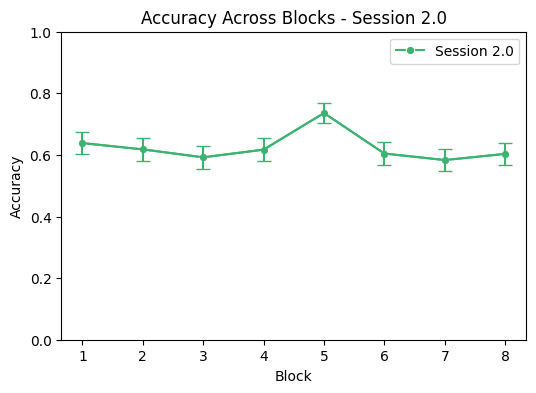

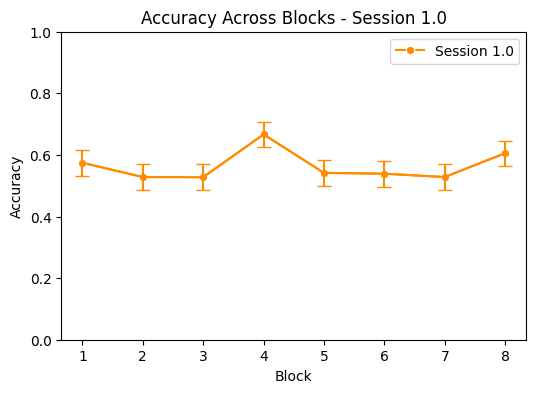

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

files = glob.glob("/Users/Angela/Desktop/code/sessionx/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# only consider choice trial 1-19
df['Response_Correct'] = pd.to_numeric(df['Response_Correct'], errors='coerce')
df_choice = df.query("1 <= `Choice Trial Index` <= 18").dropna(subset=['Response_Correct'])

# mean accuracy and standard error across blocks and sessions 
accuracy_session_df = (
    df_choice
    .groupby(['Session Number', 'Block Number'])
    .agg(mean_acc=('Response_Correct', 'mean'),
         std=('Response_Correct', 'std'),
         count=('Response_Correct', 'count'))
    .assign(sem=lambda d: d['std'] / np.sqrt(d['count']))
    .reset_index()
)

# GRAPHS
colors = ["mediumseagreen", "darkorange"]

for i, session_id in enumerate(df_choice['Session Number'].unique()):
    data = accuracy_session_df[accuracy_session_df['Session Number'] == session_id]
    
    plt.figure(figsize=(6,4))
    sns.lineplot(
        data=data,
        x='Block Number',
        y='mean_acc',
        marker='o',
        color=colors[i],
        label=f'Session {session_id}'
    )

    plt.errorbar(
        x=data['Block Number'],
        y=data['mean_acc'],
        yerr=data['sem'],
        c=colors[i],
        capsize=5
    )

    plt.title(f'Accuracy Across Blocks - Session {session_id}')
    plt.xlabel('Block')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

REACTION TIMES ACROSS BLOCKS

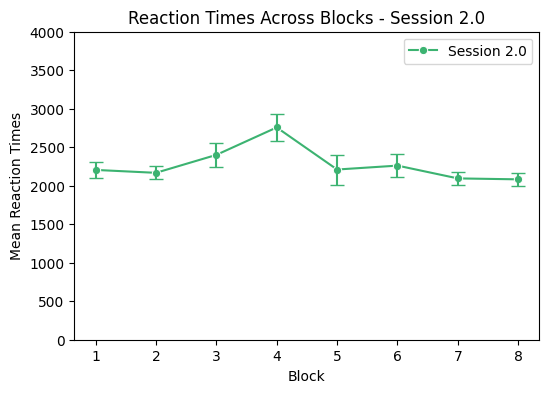

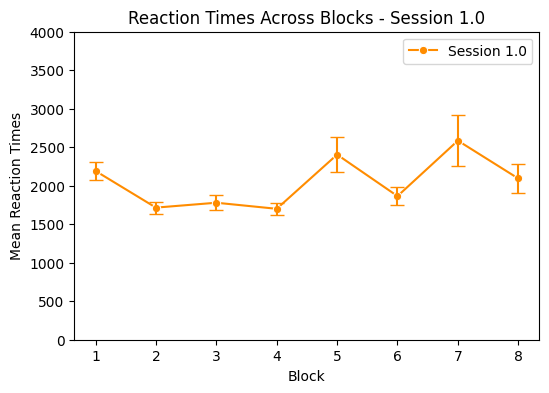

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

files = glob.glob("/Users/Angela/Desktop/code/sessionx/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# only consider choice trial 1-19
df['RT'] = pd.to_numeric(df['RT'], errors='coerce')
df_choice = df.query("1 <= `Choice Trial Index` <= 18").dropna(subset=['RT'])

# statistics
RT_session_df = (
    df_choice
    .groupby(['Session Number', 'Block Number'])
    .agg(mean_RT=('RT', 'mean'),
         std=('RT', 'std'),
         count=('RT', 'count'))
    .assign(sem=lambda d: d['std'] / np.sqrt(d['count']))  
    .reset_index()
)

# graphs
colors = ["mediumseagreen", "darkorange"]

for i, session_id in enumerate(df_choice['Session Number'].unique()):
    data = RT_session_df[RT_session_df['Session Number'] == session_id]
    
    plt.figure(figsize=(6,4))
    
    # main line
    sns.lineplot(
        data=data,
        x='Block Number',
        y='mean_RT',
        marker='o',
        color=colors[i],
        label=f'Session {session_id}'
    )
    
    # error bar
    plt.errorbar(
        x=data['Block Number'],
        y=data['mean_RT'],
        yerr=data['sem'],
        fmt='none',
        c=colors[i],
        capsize=5
    )
    
    plt.title(f'Reaction Times Across Blocks - Session {session_id}')
    plt.xlabel('Block')
    plt.ylabel('Mean Reaction Times')
    plt.ylim(0, 4000)
    plt.legend()
    plt.show()


ACCURACY IF THE DISTRACTOR IS CONSISTENT WITH COLOUR, TEXTURE, SHAPE WITH PREVIOUS OBJECT

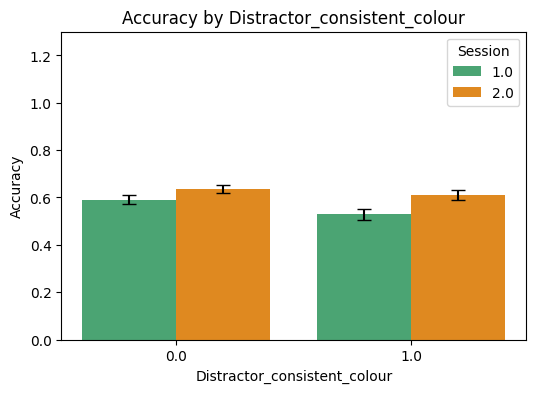

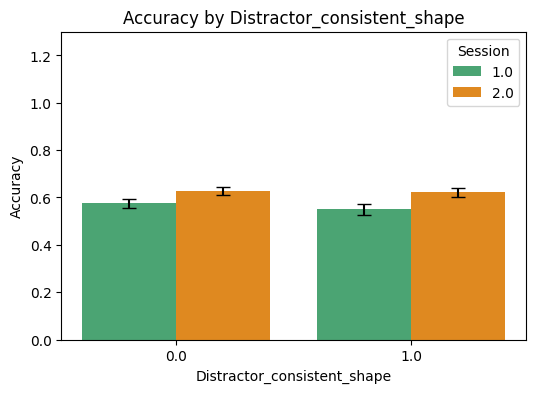

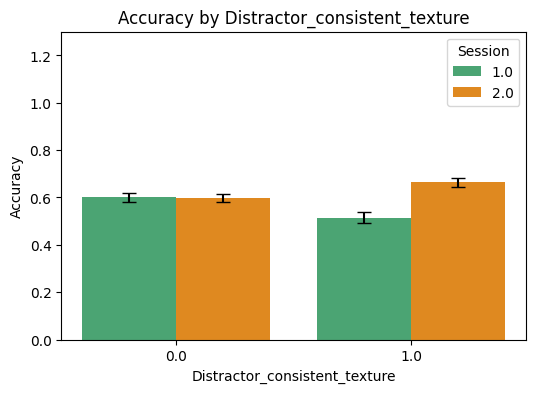

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

files = glob.glob("/Users/Angela/Desktop/code/sessionx/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# accuracy if they share and if they do not share the feature

# only read numbers choice trial 1-18
df['Choice Trial Index'] = pd.to_numeric(df['Choice Trial Index'], errors='coerce')
df_choice = df.query("1 <= `Choice Trial Index` <= 18")


features = [
    'Distractor_consistent_colour', 
    'Distractor_consistent_shape', 
    'Distractor_consistent_texture'
]

results = (
    df_choice
    .melt(id_vars=['Session Number', 'Response_Correct'], value_vars=features, var_name='feature', value_name='shares_feature')
    .groupby(['Session Number', 'feature', 'shares_feature'], as_index=False)['Response_Correct']
    .mean()
    .rename(columns={'Response_Correct': 'accuracy'})
)

# GRAPH

colors = ["mediumseagreen", "darkorange"]

for feature in features:  # a different graph for each feature
    plt.figure(figsize=(6,4))  # create a matplotlib graph, 6x4 dimention
    
    # groups data first for session 1 and 2, then for the value of the feature 0 or 1 (if shared)
    # then aggregate all the correct responses of a group and do the mean and std
    # .reset_index() transform in columns (dataframe with columns session, feature, mean, std)
    
    stats = (
        df_choice
        .groupby(['Session Number', feature])['Response_Correct']
        .agg(['mean', 'std', 'count'])
        .assign(sem=lambda d: d['std'] / np.sqrt(d['count']))
        .reset_index()
    )
    
    ax = sns.barplot(
        data=stats, 
        x=feature, 
        y='mean', 
        hue='Session Number',
        palette=colors
    )

    for bar, (_, row) in zip(ax.patches, stats.iterrows()):
        plt.errorbar(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            yerr=row['sem'],
            fmt='none', c='black', capsize=5
        )
    
    plt.title(f'Accuracy by {feature}')  
    plt.xlabel(feature)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.3)                      
    plt.legend(title='Session')
    plt.show()


ACCURACY BY NUMBER OF CONSISTENT FEATURES (DISTRACTOR CONSOSTENCY WITH PREVIOUS OBJECT)

   Session Number  Num_consistent_main_features  accuracy       sem
0             2.0                             0  0.600917  0.033244
1             2.0                             1  0.619414  0.019073
2             2.0                             2  0.638489  0.020393
3             1.0                             0  0.650000  0.037826
4             1.0                             1  0.606925  0.022065
5             1.0                             2  0.492843  0.022632


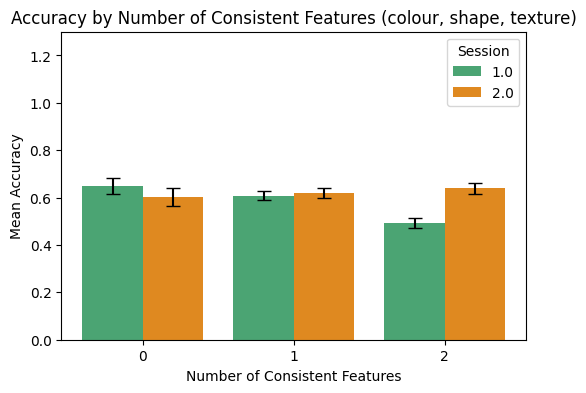

In [26]:
# accuracy if they share 0, 1, 2 consistent features 
# only colour, shape and texture

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import glob

files = glob.glob("/Users/Angela/Desktop/code/sessionx/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# only consider choice trial 1-18
df['Response_Correct'] = pd.to_numeric(df['Response_Correct'], errors='coerce')
df_choice = df.query("1 <= `Choice Trial Index` <= 18").dropna(subset=['Response_Correct'])

features = [
    'Distractor_consistent_colour', 
    'Distractor_consistent_shape', 
    'Distractor_consistent_texture'
]

results_list = []

# session 1 and 2
for session_id in df_choice['Session Number'].unique():  #column session and give all different values in session (1 and 2)
    session_data2 = df_choice.query("`Session Number` == @session_id")  #True/False for each line, depending on if that line is part of the current session
    session_data2 = session_data2.assign(
        Num_consistent_main_features=session_data2[features].sum(axis=1)  #tells the number of shared features
    )
    
    # groups for every line with the same number of shared features
    grouped = (
        session_data2
        .groupby('Num_consistent_main_features')['Response_Correct']
        .agg(['mean', 'std', 'count'])
        .reindex([0, 1, 2], fill_value=0)  
        .assign(sem=lambda d: d['std'] / np.sqrt(d['count']))  
    )

    # n shared features + mean accuracy for n of shared features    
    results_list.extend([
        {'Session Number': session_id,
         'Num_consistent_main_features': num_feat,
         'accuracy': row['mean'],
         'sem': row['sem']}   
        for num_feat, row in grouped.iterrows()
    ])

accuracy_df = pd.DataFrame(results_list)

print(accuracy_df)

# graph

colors = ["mediumseagreen", "darkorange"]
plt.figure(figsize=(6,4))

ax = sns.barplot(
    data=accuracy_df, 
    x='Num_consistent_main_features',
    y='accuracy',
    hue='Session Number',
    palette=colors
)

# error bar
for bar, (_, row) in zip(ax.patches, accuracy_df.iterrows()):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x, y, yerr=row['sem'], fmt='none', c='black', capsize=5)  

plt.title('Accuracy by Number of Consistent Features (colour, shape, texture)')
plt.xlabel('Number of Consistent Features')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1.3)
plt.legend(title='Session')
plt.show()


REACTION TIMES BY NUMBER OF SHARED FEATURES (DISTRACTOR CONSOSTENCY WITH PREVIOUS OBJECT)

   Session Number  Num_consistent_main_features     accuracy         sem
0             2.0                             0  2247.917431   95.214140
1             2.0                             1  2302.423729   61.651633
2             2.0                             2  2243.767986   91.807345
3             1.0                             0  2361.681250  250.706968
4             1.0                             1  2091.116090   95.131860
5             1.0                             2  1886.907975   72.522025


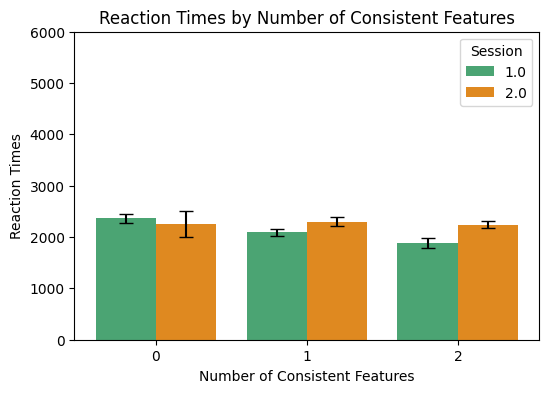

In [27]:
# REACTION TIMES if they are consistent 0, 1, 2 features together

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import glob

files = glob.glob("/Users/Angela/Desktop/code/sessionx/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

df['RT'] = pd.to_numeric(df['RT'], errors='coerce')
df_choice = df.query("1 <= `Choice Trial Index` <= 18")

features = [
    'Distractor_consistent_colour', 
    'Distractor_consistent_shape', 
    'Distractor_consistent_texture'
]

results_list = []

# session 1 and 2
for session_id in df_choice['Session Number'].unique():  # column session and give all different values in session (1 and 2)
    session_data2 = df_choice.query("`Session Number` == @session_id")  # True/False for each line, depending on if that line is part of the current session
    session_data2 = session_data2.assign(
        Num_consistent_main_features=session_data2[features].sum(axis=1)  # tells the number of shared features
    )
    
    # groups for every line with the same number of shared features
    grouped = (
        session_data2
        .groupby('Num_consistent_main_features')['RT']
        .agg(['mean', 'std', 'count'])
        .reindex([0, 1, 2], fill_value=0)  
        .assign(sem=lambda d: d['std'] / np.sqrt(d['count']))  
    )

    # n shared features + mean accuracy for n of shared features    
    results_list.extend([
        {'Session Number': session_id,
         'Num_consistent_main_features': num_feat,
         'accuracy': row['mean'],
         'sem': row['sem']}   
        for num_feat, row in grouped.iterrows()
    ])

accuracy_df = pd.DataFrame(results_list)

print(accuracy_df)

# graph

colors = ["mediumseagreen", "darkorange"] 
plt.figure(figsize=(6,4))

ax = sns.barplot(
    data=accuracy_df, 
    x='Num_consistent_main_features',
    y='accuracy',
    hue='Session Number',
    palette=colors 
)

# error bar
for bar, (_, row) in zip(ax.patches, accuracy_df.iterrows()):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x, y, yerr=row['sem'], fmt='none', c='black', capsize=5)  

plt.title('Reaction Times by Number of Consistent Features')
plt.xlabel('Number of Consistent Features')
plt.ylabel('Reaction Times')
plt.ylim(0, 6000)
plt.legend(title='Session')
plt.show()


PROBABILITY OF CHOOSING THE TARGET BASED ON DISTRACTOR CONSISTENCY COLOUR, SHAPE, TEXTURE

Optimization terminated successfully.
         Current function value: 0.672789
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Response_Correct   No. Observations:                 2563
Model:                          Logit   Df Residuals:                     2559
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Oct 2025   Pseudo R-squ.:                0.001904
Time:                        13:22:41   Log-Likelihood:                -1724.4
converged:                       True   LL-Null:                       -1727.6
Covariance Type:            nonrobust   LLR p-value:                   0.08658
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.5556      0.084      6.602      0.

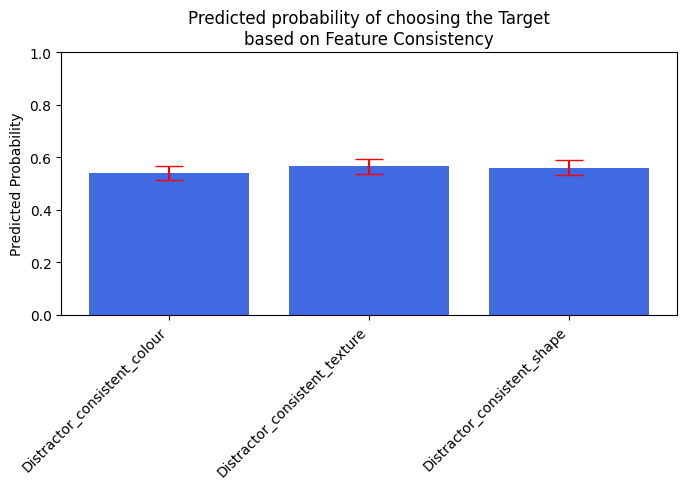

In [28]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import glob

files = glob.glob("/Users/Angela/Desktop/code/sessionx/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# only consider choice trial 1-18
df['Response_Correct'] = pd.to_numeric(df['Response_Correct'], errors='coerce')
df_choice = df.query("1 <= `Choice Trial Index` <= 18").dropna(subset=['Response_Correct'])


predictors = [
    'Distractor_consistent_colour',
    'Distractor_consistent_texture',
    'Distractor_consistent_shape'
]

# only consider numeric trials
df_choice[predictors] = df_choice[predictors].apply(pd.to_numeric, errors='coerce')
df_choice = df_choice.dropna(subset=predictors)

# logistic regression
X = sm.add_constant(df_choice[predictors])  # intercept
y = df_choice['Response_Correct'].astype(float)

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# predicted probabilities
df_choice['predicted_prob'] = result.predict(X)


# column with participants' ID
subject_col = 'ppID'  

features = predictors
grouped = []

for f in features:
    participant_values = df_choice[df_choice[f] == 1].groupby(subject_col)['Response_Correct'].mean()
    mean_val = participant_values.mean()
    sem_val = participant_values.std(ddof=1) / np.sqrt(len(participant_values))
    grouped.append({
        'feature': f,
        'mean': mean_val,
        'sem': sem_val
    })

grouped = pd.DataFrame(grouped)
grouped['label'] = grouped['feature']

# graph
plt.figure(figsize=(7,5))
plt.title("Predicted probability of choosing the Target\nbased on Feature Consistency")
plt.ylabel("Predicted Probability")
plt.bar(
    grouped['label'],
    grouped['mean'],
    yerr=grouped['sem'],
    color='royalblue',
    ecolor='red',
    capsize=10
)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Optimization terminated successfully.
         Current function value: 0.672789
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       Response_Correct   No. Observations:                 2563
Model:                          Logit   Df Residuals:                     2559
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Oct 2025   Pseudo R-squ.:                0.001904
Time:                        13:22:48   Log-Likelihood:                -1724.4
converged:                       True   LL-Null:                       -1727.6
Covariance Type:            nonrobust   LLR p-value:                   0.08658
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.5556      0.084      6.602      0.

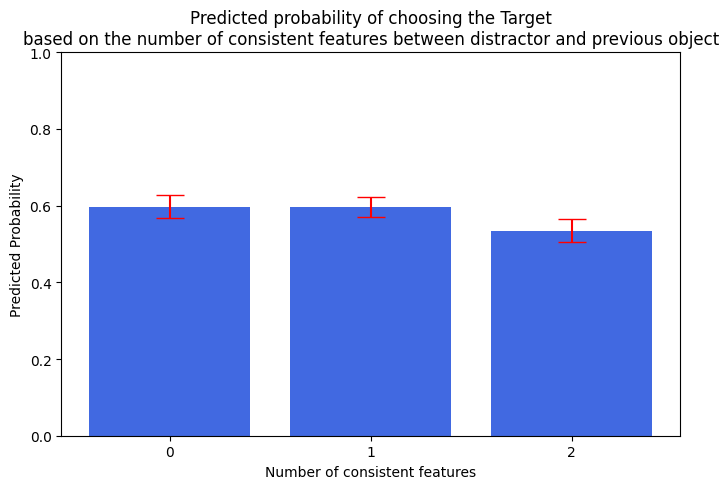

In [29]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import glob

files = glob.glob("/Users/Angela/Desktop/code/sessionx/*.csv")
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# only consider choice trial 1-18
df['Response_Correct'] = pd.to_numeric(df['Response_Correct'], errors='coerce')
df = df.dropna(subset=['Response_Correct'])


# logistic regression
X = sm.add_constant(df[predictors])  # intercept
y = df['Response_Correct']

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

# predicted probabilities
df['predicted_prob'] = result.predict(X)

# column with participants' ID
subject_col = 'ppID'  

# how many features are consistent for each raw
df['num_consistent'] = df[predictors].sum(axis=1)


grouped_list = []

for n in df['num_consistent'].unique():
    df_subset = df[df['num_consistent'] == n]
    participant_means = df_subset.groupby(subject_col)['Response_Correct'].mean()
    mean_val = participant_means.mean()
    sem_val = participant_means.std(ddof=1) / np.sqrt(len(participant_means))
    
    grouped_list.append({
        'num_consistent': n,
        'mean': mean_val,
        'sem': sem_val
    })

grouped = pd.DataFrame(grouped_list)

# graph
plt.figure(figsize=(7,5))
plt.title("Predicted probability of choosing the Target\nbased on the number of consistent features between distractor and previous object")
plt.xlabel("Number of consistent features")
plt.ylabel("Predicted Probability")

plt.bar(
    grouped['num_consistent'], 
    grouped['mean'], 
    yerr=grouped['sem'], 
    color='royalblue',  
    ecolor='red',     
    capsize=10
)

plt.xticks([0,1,2])  
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
